<div class="alert alert-block alert-info">
<h1><b>Aim:</b> Support Vector Machine Algorithm </h1></div>

# Implementation with sklearn (Non-Linear SVM)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Data Understanding
> Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [2]:
email_rec = pd.read_csv("Spam.txt",  sep = ',', header= None )

In [3]:
print(email_rec.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


>As of now, the columns are named as integers. Let's manually name the columns appropriately (column names are available at the UCI website here: [UCI link](https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names)

In [4]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [5]:
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


>look at dimensions of the df

In [6]:
email_rec.shape

(4601, 58)

> ensure that data type are correct

In [7]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

> there are no missing values in the dataset

In [8]:
 email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Let's also look at the fraction of spam and ham emails in the dataset.
>look at fraction of spam emails 39.4% spams

In [9]:
email_rec['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

## Data Preparation
> Let's now conduct some prelimininary data preparation steps, i.e. rescaling the variables, splitting into train and test etc. To understand why rescaling is required, let's print the summary stats of all columns - you'll notice that the columns at the end (capital_run_length_longest, capital_run_length_total etc.) have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email).

In [10]:
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


> splitting into X and y

In [11]:
X = email_rec.drop("spam", axis = 1)
y = email_rec.spam.values.astype(int)

> scaling the features
> note that the scale function standardises each column, i.e. `x = x-mean(x)/std(x)`

In [12]:
X = scale(X)

> split into train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

> confirm that splitting also has similar distribution of spam and ham emails

In [14]:
y_train.mean()

0.3978260869565217

In [15]:
y_test.mean()

0.38522809558291093

## Model Building Using rbf
> Let's build a linear SVM mode now. The SVC() class does that in sklearn. We highly recommend reading the documentation at least once. Instantiate an object of class SVC() [note that we are using cost C=1]

[[811  38]
 [ 61 471]]

accuracy 0.9283128167994207

precision 0.925343811394892

recall 0.8853383458646616

Fitting 5 folds for each of 12 candidates, totalling 60 fits

The best test score is 0.9338509316770185 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


[[810  39]
 [ 60 472]] 

accuracy 0.9283128167994207

precision 0.923679060665362

sensitivity/recall 0.8872180451127819


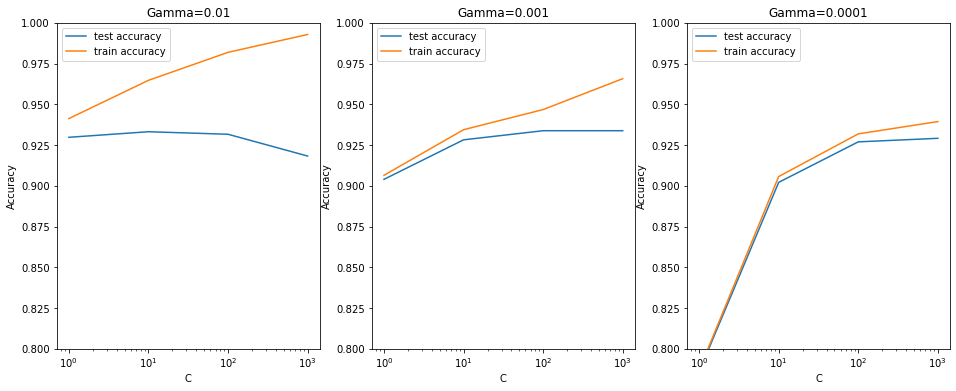

In [18]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation Metrics

# confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("\naccuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("\nprecision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("\nrecall", metrics.recall_score(y_test, y_pred))
print()
## Hyperparameter Tuning

'''Now, we have multiple hyperparameters to optimise -

- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the GridSearchCV() method to tune the hyperparameters.'''

## Grid Search to Find Optimal Hyperparameters
#Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time).

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv_rbf = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_rbf.fit(X_train, y_train)   

# cv results
cv_results_rbf = pd.DataFrame(model_cv_rbf.cv_results_)
cv_results_rbf

# converting C to numeric type for plotting on x-axis
cv_results_rbf['param_C'] = cv_results_rbf['param_C'].astype('int')

## plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results_rbf[cv_results_rbf['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results_rbf[cv_results_rbf['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results_rbf[cv_results_rbf['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

'''This plot reveals some interesting insights:

- High values of gamma lead to overfitting (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99%
- The training score increases with higher gamma, though the test scores are comparable (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite simple non-linear model
'''
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_rbf.best_score_
best_hyperparams = model_cv_rbf.best_params_

print("\nThe best test score is {0} corresponding to hyperparameters {1}\n".format(best_score, best_hyperparams))

'''The best test score is 0.9338509316770185 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}
Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.
'''
## Building and Evaluating the Final Model
# Let's now build and evaluate the final model, i.e. the model with highest test accuracy

# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model_rbf = SVC(C=100, gamma=0.0001, kernel="rbf")

model_rbf.fit(X_train, y_train)
y_pred = model_rbf.predict(X_test)

# metrics
print()
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("\nprecision", metrics.precision_score(y_test, y_pred))
print("\nsensitivity/recall", metrics.recall_score(y_test, y_pred))

## Model Building Using polynomial 

[[834  15]
 [296 236]]

accuracy 0.774800868935554

precision 0.9402390438247012

recall 0.44360902255639095

Fitting 5 folds for each of 12 candidates, totalling 60 fits


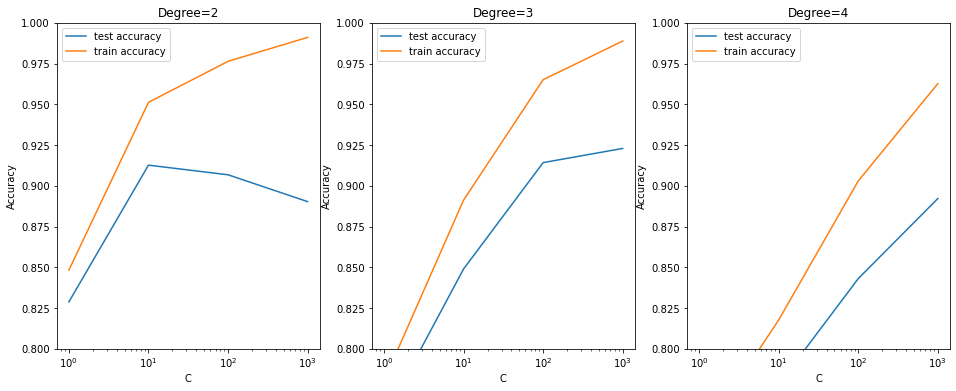

The best test score is 0.9229813664596274 corresponding to hyperparameters {'C': 1000, 'degree': 3}

[[816  33]
 [ 80 452]] 

accuracy 0.9181752353367125

precision 0.931958762886598

sensitivity/recall 0.849624060150376


In [21]:
model = SVC(C=1, kernel='poly', degree=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation Metrics

# confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# accuracy
print("\naccuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("\nprecision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("\nrecall", metrics.recall_score(y_test, y_pred))
print()
## Hyperparameter Tuning

'''Now, we have multiple hyperparameters to optimise -

- The choice of kernel (linear, rbf etc.)
- C
- degree

We'll use the GridSearchCV() method to tune the hyperparameters.'''

## Grid Search to Find Optimal Hyperparameters

# Creating a KFold object with 5 splits 
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [{'degree': [2, 3, 4],  # Degree of the polynomial kernel
                 'C': [1, 10, 100, 1000]}]  # Regularization parameter

# Specify model with polynomial kernel
model = SVC(kernel="poly")

# Set up GridSearchCV()
model_cv_poly = GridSearchCV(estimator=model, 
                        param_grid=hyper_params, 
                        scoring='accuracy', 
                        cv=folds, 
                        verbose=1,
                        return_train_score=True)      

# Fit the model
model_cv_poly.fit(X_train, y_train)

# cv results
cv_results_poly = pd.DataFrame(model_cv_poly.cv_results_)
cv_results_poly



# Converting C to numeric type for plotting on x-axis
cv_results_poly['param_C'] = cv_results_poly['param_C'].astype('int')

# Plotting
plt.figure(figsize=(16, 6))

# Subplot 1/3
plt.subplot(131)
degree_2 = cv_results_poly[cv_results_poly['param_degree'] == 2]

plt.plot(degree_2["param_C"], degree_2["mean_test_score"])
plt.plot(degree_2["param_C"], degree_2["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=2")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# Subplot 2/3
plt.subplot(132)
degree_3 = cv_results_poly[cv_results_poly['param_degree'] == 3]

plt.plot(degree_3["param_C"], degree_3["mean_test_score"])
plt.plot(degree_3["param_C"], degree_3["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=3")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# Subplot 3/3
plt.subplot(133)
degree_4 = cv_results_poly[cv_results_poly['param_degree'] == 4]

plt.plot(degree_4["param_C"], degree_4["mean_test_score"])
plt.plot(degree_4["param_C"], degree_4["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=4")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()


# printing the optimal accuracy score and hyperparameters
best_score = model_cv_poly.best_score_
best_hyperparams = model_cv_poly.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

## Building and Evaluating the Final Model
#Let's now build and evaluate the final model, i.e. the model with highest test accuracy

# specify optimal hyperparameters
best_params = {"C": 100, "degree": 3, "kernel":"poly"}

# model
model_poly = SVC(C=100, degree = 3, kernel="poly")

model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)

# metrics
print()
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("\nprecision", metrics.precision_score(y_test, y_pred))
print("\nsensitivity/recall", metrics.recall_score(y_test, y_pred))

## Model Building Using sigmoid

Confusion Matrix:
[[775  74]
 [ 70 462]]

Accuracy: 0.8957277335264301

Precision: 0.8619402985074627

Recall/Sensitivity: 0.868421052631579

Fitting 5 folds for each of 7 candidates, totalling 35 fits


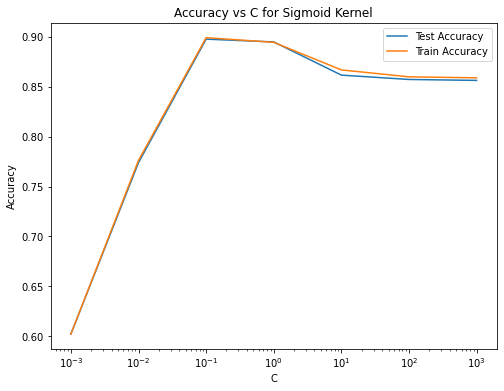


The best test score is 0.8975155279503106 corresponding to hyperparameters {'C': 0.1}

Confusion Matrix:
 [[775  74]
 [ 70 462]]

Accuracy: 0.8957277335264301

Precision: 0.8619402985074627

Recall/Sensitivity: 0.868421052631579


In [22]:
# Model training with sigmoid kernel
model = SVC(C=1, kernel='sigmoid')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation Metrics

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# Accuracy
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))

# Precision
print("\nPrecision:", metrics.precision_score(y_test, y_pred))

# Recall/Sensitivity
print("\nRecall/Sensitivity:", metrics.recall_score(y_test, y_pred))
print()
## Hyperparameter Tuning

'''Now, we have multiple hyperparameters to optimize:

- C

We'll use the GridSearchCV() method to tune the hyperparameters.'''

# Creating a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify range of hyperparameters
hyper_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]  # Regularization parameter

# Specify model with sigmoid kernel
model = SVC(kernel="sigmoid")

# Set up GridSearchCV()
model_cv_sigmoid = GridSearchCV(estimator=model, 
                                param_grid=hyper_params, 
                                scoring='accuracy', 
                                cv=folds, 
                                verbose=1,
                                return_train_score=True)      

# Fit the model
model_cv_sigmoid.fit(X_train, y_train)

# CV results
cv_results_sigmoid = pd.DataFrame(model_cv_sigmoid.cv_results_)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(cv_results_sigmoid["param_C"], cv_results_sigmoid["mean_test_score"], label="Test Accuracy")
plt.plot(cv_results_sigmoid["param_C"], cv_results_sigmoid["mean_train_score"], label="Train Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Accuracy vs C for Sigmoid Kernel")
plt.xscale('log')
plt.legend()
plt.show()

# Printing the optimal accuracy score and hyperparameters
best_score_sigmoid = model_cv_sigmoid.best_score_
best_hyperparams_sigmoid = model_cv_sigmoid.best_params_

print("\nThe best test score is {0} corresponding to hyperparameters {1}".format(best_score_sigmoid, best_hyperparams_sigmoid))

## Building and Evaluating the Final Model
# Let's now build and evaluate the final model, i.e. the model with the highest test accuracy

# Specify optimal hyperparameters
best_params_sigmoid = {"C": 1, "kernel": "sigmoid"}

# Model
model_sigmoid = SVC(C=1, kernel="sigmoid")

model_sigmoid.fit(X_train, y_train)
y_pred = model_sigmoid.predict(X_test)

# Metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nPrecision:", metrics.precision_score(y_test, y_pred))
print("\nRecall/Sensitivity:", metrics.recall_score(y_test, y_pred))


## Model Building Using Linear

In [ ]:
# Linear Kernel model
model_linear = SVC(kernel='linear')

# Fit the model
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

## Model Evaluation Metrics for Linear Kernel

# confusion matrix
print("Confusion Matrix for Linear Kernel:")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_linear))

# accuracy
print("\nAccuracy for Linear Kernel:", accuracy_score(y_test, y_pred_linear))

# precision
print("\nPrecision for Linear Kernel:", precision_score(y_test, y_pred_linear))

# recall/sensitivity
print("\nRecall for Linear Kernel:", recall_score(y_test, y_pred_linear))
print()

## Hyperparameter Tuning for Linear Kernel

# Creating a KFold object with 5 splits 
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params_linear = {'C': [1, 10, 100, 1000]}  # Regularization parameter

# Set up GridSearchCV()
model_cv_linear = GridSearchCV(estimator=model_linear, 
                        param_grid=hyper_params_linear, 
                        scoring='accuracy', 
                        cv=folds, 
                        verbose=1,
                        return_train_score=True)      

# Fit the model
model_cv_linear.fit(X_train, y_train)

# cv results
cv_results_linear = pd.DataFrame(model_cv_linear.cv_results_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cv_results_linear["param_C"], cv_results_linear["mean_test_score"], label='Test accuracy')
plt.plot(cv_results_linear["param_C"], cv_results_linear["mean_train_score"], label='Train accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Linear Kernel")
plt.ylim([0.80, 1])
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Printing the optimal accuracy score and hyperparameters for Linear Kernel
best_score_linear = model_cv_linear.best_score_
best_hyperparams_linear = model_cv_linear.best_params_

print("The best test score for Linear Kernel is {0} corresponding to hyperparameters {1}".format(best_score_linear, best_hyperparams_linear))

## Building and Evaluating the Final Model for Linear Kernel

# specify optimal hyperparameters
best_params_linear = {"C": 100}

# model
model_linear_final = SVC(**best_params_linear, kernel="linear")

model_linear_final.fit(X_train, y_train)
y_pred_linear_final = model_linear_final.predict(X_test)

# metrics
print()
print("Confusion Matrix for Linear Kernel (Final Model):")
print(confusion_matrix(y_test, y_pred_linear_final), "\n")
print("Accuracy for Linear Kernel (Final Model):", accuracy_score(y_test, y_pred_linear_final))
print("Precision for Linear Kernel (Final Model):", precision_score(y_test, y_pred_linear_final))
print("Recall for Linear Kernel (Final Model):", recall_score(y_test, y_pred_linear_final))